In [34]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import pandas as pd
import seaborn as sns
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
scores = pd.read_csv("../data/ES_2-5_79cases_newVnames.csv")
scores.head()

,FAMILY,TCGender,FB2,Eng2,FB3,Eng3,FB4,Eng4,FB5,Eng5,...,Obs4,Act4,Car4,Hop4,Vid4,Con5,Obs5,Act5,Car5,Hop5
0,ESC319,8,5.0,4,999.0,999,4.2,4,4.200,5,...,4,4,5,5,0,5,4,4,4,4
1,ESC343,1,4.0,4,999.0,999,4.0,3,4.600,5,...,4,3,5,4,0,5,5,4,4,5
2,ESC413,1,5.8,4,6.4,7,4.4,4,5.924,9,...,5,4,5,4,0,8,8,8,8,9
3,ESC432,8,6.4,7,999.0,999,3.0,3,5.724,9,...,2,3,5,3,0,8,8,8,8,8
4,ESC452,8,3.6,4,999.0,999,5.4,6,3.800,4,...,5,5,5,6,0,5,4,4,3,3


In [2]:
labels = pd.read_csv("../data/DialogTagger/prepLIWC_allFiles.trigrams.ctxc0-1.cnt2.seq.label.withnames", sep = "\t", names=["meta", "label"])
labels.head()

,meta,label
0,ESC805A2FB_1.8.Interviewer,Statement
1,ESC805A2FB_1.12.Interviewee,Backchannel
2,ESC805A2FB_1.14.Interviewer,Statement
3,ESC805A2FB_1.20.Interviewee,Statement
4,ESC805A2FB_1.22.Interviewer,Backchannel


In [6]:
labels['filename'] = labels['meta'].apply(lambda x: x.split(".")[0])
labels['lineno'] = labels['meta'].apply(lambda x: x.split(".")[1])
labels['speaker'] = labels['meta'].apply(lambda x: x.split(".")[2])
labels.head()

,meta,label,filename,lineno,speaker
0,ESC805A2FB_1.8.Interviewer,Statement,ESC805A2FB_1,8,Interviewer
1,ESC805A2FB_1.12.Interviewee,Backchannel,ESC805A2FB_1,12,Interviewee
2,ESC805A2FB_1.14.Interviewer,Statement,ESC805A2FB_1,14,Interviewer
3,ESC805A2FB_1.20.Interviewee,Statement,ESC805A2FB_1,20,Interviewee
4,ESC805A2FB_1.22.Interviewer,Backchannel,ESC805A2FB_1,22,Interviewer


In [7]:
labels['FAMILY'] = labels['filename'].apply(lambda x: x.split()[0].split("-")[0].split("_")[0].replace("A2FB", ""))
labels.head()

,meta,label,filename,lineno,speaker,FAMILY
0,ESC805A2FB_1.8.Interviewer,Statement,ESC805A2FB_1,8,Interviewer,ESC805
1,ESC805A2FB_1.12.Interviewee,Backchannel,ESC805A2FB_1,12,Interviewee,ESC805
2,ESC805A2FB_1.14.Interviewer,Statement,ESC805A2FB_1,14,Interviewer,ESC805
3,ESC805A2FB_1.20.Interviewee,Statement,ESC805A2FB_1,20,Interviewee,ESC805
4,ESC805A2FB_1.22.Interviewer,Backchannel,ESC805A2FB_1,22,Interviewer,ESC805


In [27]:
# Agg into counts of label
tmp = labels.groupby(['FAMILY', 'speaker', 'label']).agg(len)
tmp.reset_index(inplace = True)
tmp.head()

,FAMILY,speaker,label,meta,filename,lineno
0,ESC805,Interviewee,Appreciation,1,1,1
1,ESC805,Interviewee,Backchannel,21,21,21
2,ESC805,Interviewee,Incomplete,5,5,5
3,ESC805,Interviewee,Other,36,36,36
4,ESC805,Interviewee,Question,11,11,11


In [28]:
data = pd.merge(tmp, scores[['FAMILY', 'Hop2']], left_on = "FAMILY", right_on = 'FAMILY')
data.head()

,FAMILY,speaker,label,meta,filename,lineno,Hop2
0,ESC805,Interviewee,Appreciation,1,1,1,3
1,ESC805,Interviewee,Backchannel,21,21,21,3
2,ESC805,Interviewee,Incomplete,5,5,5,3
3,ESC805,Interviewee,Other,36,36,36,3
4,ESC805,Interviewee,Question,11,11,11,3


In [29]:
# Var for therapists
therapist = ['Interviewer', 'Therapist']
data['therapist'] = False
data.ix[data['speaker'].isin(therapist),'therapist'] = True

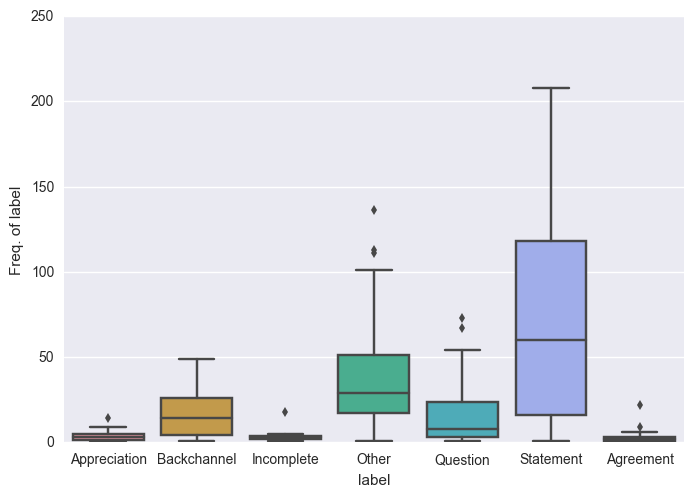

In [38]:
sns.boxplot(x = 'label', y = 'meta', data = data);
plt.ylabel("Freq. of label");

In [33]:
for label in data.label.unique():
    therapist_d = data[data.therapist == True]
    therapist_d = therapist_d[therapist_d.label == label]

    # Spearman's correlation w/ score
    print(label)
    print(stats.spearmanr(therapist_d['meta'], therapist_d['Hop2']))
    print()


Appreciation
SpearmanrResult(correlation=-0.074547104320563953, pvalue=0.86074116410648216)

Backchannel
SpearmanrResult(correlation=-0.23939494881986931, pvalue=0.53500336976085694)

Incomplete
SpearmanrResult(correlation=0.56060606060606055, pvalue=0.24718430865125063)

Other
SpearmanrResult(correlation=-0.21374549001774043, pvalue=0.58080057903086146)

Question
SpearmanrResult(correlation=-0.0085498196007096176, pvalue=0.98258351151010503)

Statement
SpearmanrResult(correlation=0.12075750327549375, pvalue=0.73966141238162519)

Agreement
SpearmanrResult(correlation=0.81481481481481488, pvalue=0.025583868892683725)

